In [5]:
import pandas
import plotly.express as px
%matplotlib inline
from pandas.plotting import scatter_matrix

In [6]:
df = pandas.read_excel('/Users/elias.nema/Downloads/Arsenal Player Stats 2018-19.xlsx')

In [7]:
df.columns

Index(['Rank', 'Player', 'Nationality', 'Metric', 'Stat'], dtype='object')

In [8]:
training = df.pivot(index='Player', columns='Metric', values='Stat')

In [9]:
pandas.set_option('display.max_columns', None)

In [10]:
training.head()

Metric,Appearances,Assists,Big Chances Missed,Clearances,Clearances Off Line,Dispossessed,Fouls,Goals,High Claim,Hit Woodwork,Minutes Played,Offsides,Own Goal,Passes,Punches,Red Cards,Saves,Shots,Tackles,Touches,Yellow Cards
Player,,,,,,,,,,,,,,,,,,,,,
Aaron Ramsey,28,6,2,3,0,27,21,4,0,0,1328,4,0,773,0,0,0,33,34,1029,0
Ainsley Maitland-Niles,16,1,0,11,1,17,8,1,0,0,986,1,0,451,0,1,0,5,33,782,1
Alex Iwobi,35,6,3,10,0,56,8,3,0,0,1972,2,0,951,0,0,0,35,28,1415,0
Alexandre Lacazette,35,8,13,29,0,61,51,13,0,1,2505,24,0,771,0,0,0,81,35,1313,2
Bernd Leno,32,0,0,32,0,1,0,0,10,0,2835,0,0,922,16,0,105,0,0,1276,0


### Adding some data on positions

In [11]:
position_lookup = {k:'' for k in training.index.tolist()}

for gk in ['Bernd Leno', 'Petr Cech']:
    position_lookup[gk] = 'GK'

for df in [
    'Carl Jenkinson','Héctor Bellerín','Laurent Koscielny','Rob Holding','Sead Kolasinac'
    ,'Shkodran Mustafi','Sokratis','Stephan Lichtsteiner'
]:
    position_lookup[df] = 'DF'

for mf in [
    'Aaron Ramsey','Ainsley Maitland-Niles','Denis Suárez','Granit Xhaka','Henrikh Mkhitaryan'
    ,'Joe Willock','Konstantinos Mavropanos','Lucas Torreira', 'Matteo Guendouzi','Mesut Özil'
    ,'Mohamed Elneny','Nacho Monreal',
]:
    position_lookup[mf] = 'MF'


for fw in [
    'Alex Iwobi','Alexandre Lacazette','Bukayo Saka','Danny Welbeck','Eddie Nketiah','Pierre-Emerick Aubameyang'
]:
    position_lookup[fw] = 'FW'

training['position'] = training.index.map(position_lookup)

In [12]:
training.columns

Index(['Appearances', 'Assists', 'Big Chances Missed', 'Clearances',
       'Clearances Off Line', 'Dispossessed', 'Fouls', 'Goals', 'High Claim',
       'Hit Woodwork', 'Minutes Played', 'Offsides', 'Own Goal', 'Passes',
       'Punches', 'Red Cards', 'Saves', 'Shots', 'Tackles', 'Touches',
       'Yellow Cards', 'position'],
      dtype='object', name='Metric')

In [13]:
initial_columns = ['Appearances', 'Assists', 'Big Chances Missed', 'Clearances',
       'Clearances Off Line', 'Dispossessed', 'Fouls', 'Goals', 'High Claim',
       'Hit Woodwork', 'Minutes Played', 'Offsides', 'Own Goal', 'Passes',
       'Punches', 'Red Cards', 'Saves', 'Shots', 'Tackles', 'Touches',
       'Yellow Cards']

In [14]:
data_per_position = training[initial_columns + ['position']].groupby('position').sum()

In [15]:
data_per_position

Metric,Appearances,Assists,Big Chances Missed,Clearances,Clearances Off Line,Dispossessed,Fouls,Goals,High Claim,Hit Woodwork,Minutes Played,Offsides,Own Goal,Passes,Punches,Red Cards,Saves,Shots,Tackles,Touches,Yellow Cards
position,,,,,,,,,,,,,,,,,,,,,
DF,143,12,2,459,1,64,143,6,0,0,11479,17,1,6968,0,0,0,64,201,9185,34
FW,120,20,39,59,0,156,76,40,0,5,7425,51,0,2488,0,0,0,217,88,3984,2
GK,39,0,0,39,0,1,0,0,16,0,3420,0,0,1146,18,0,133,0,1,1591,0
MF,229,20,9,205,2,188,193,23,0,3,15241,21,0,10203,0,2,0,186,319,13366,36


In [16]:
training.sum()[['Minutes Played', 'Touches', 'Passes', 'Shots', 'Big Chances Missed','Assists', 'Goals', 'Offsides']]


Metric
Minutes Played        37565
Touches               28126
Passes                20805
Shots                   467
Big Chances Missed       50
Assists                  52
Goals                    69
Offsides                 89
dtype: object

In [17]:
common_kpis = ['Appearances', 'Minutes Played', 'Passes', 'Touches']
gk_kpis = ['Clearances', 'Clearances Off Line', 'High Claim', 'Punches', 'Saves']
df_kpis = ['Clearances', 'Clearances Off Line', 'Fouls', 'Tackles', 'Red Cards', 'Yellow Cards']


### Common Metrics

In [34]:
training['passes_per_min_played'] = training['Passes'] / training['Minutes Played']
training['passes_per_appearance'] = training['Passes'] / training['Appearances']
training['min_played_per_apperance'] = training['Minutes Played'] / training['Appearances']
training['touches_per_appearance'] = training['Touches'] / training['Appearances']
training['touches_per_min_played'] = training['Touches'] / training['Minutes Played']


### GK Metrics

In [35]:
training['high_claim_per_min_played'] = training['High Claim'] / training['Minutes Played']
training['punches_per_min_played'] = training['Punches'] / training['Minutes Played']
training['saves_per_min_played'] = training['Saves'] / training['Minutes Played']

training['high_claim_per_appearance'] = training['High Claim'] / training['Appearances']
training['punches_per_appearance'] = training['Punches'] / training['Appearances']
training['saves_per_appearance'] = training['Saves'] / training['Appearances']

### DF Metrics

In [24]:
training['clearances_per_min_played'] = training['Clearances'] / training['Minutes Played']
training['clearances_per_appearance'] = training['Clearances'] / training['Appearances']
training['clearances_per_touch'] = training['Clearances'] / training['Touches']
training['fouls_per_appearance'] = training['Fouls'] / training['Appearances']
training['fouls_per_clearance'] = training['Fouls'] / training['Clearances']
training['fouls_per_touch'] = training['Fouls'] / training['Touches']
training['yc_per_min_played'] = training['Yellow Cards'] / training['Minutes Played']
training['yc_per_tackle'] = training['Yellow Cards'] / training['Tackles']
training['yc_per_foul'] = training['Yellow Cards'] / training['Fouls']
training['tackles_per_appearance'] = training['Tackles'] / training['Appearances']
training['tackles_per_min_played'] = training['Tackles'] / training['Minutes Played']

### Midfield Metrics

In [36]:
training['assists_per_appearance'] = training['Assists'] / training['Appearances']
training['assists_per_min_played'] = training['Assists'] / training['Minutes Played']
training['assists_per_pass'] = training['Assists'] / training['Passes']
training['assists_per_touch'] = training['Assists'] / training['Touches']
training['dispossessed_per_appearance'] = training['Dispossessed'] / training['Appearances']
training['dispossessed_per_min_played'] = training['Dispossessed'] / training['Minutes Played']
training['dispossessed_per_pass'] = training['Dispossessed'] / training['Passes']
training['dispossessed_per_touch'] = training['Dispossessed'] / training['Touches']
training['fouls_per_appearance'] = training['Fouls'] / training['Appearances']
training['fouls_per_clearance'] = training['Fouls'] / training['Clearances']
training['fouls_per_min_played'] = training['Fouls'] / training['Minutes Played']
training['fouls_per_touch'] = training['Fouls'] / training['Touches']
training['goals_per_appearance'] = training['Goals'] / training['Appearances']
training['goals_per_min_played'] = training['Goals'] / training['Minutes Played']
training['goals_per_shot'] = training['Goals'] / training['Shots']
training['goals_per_touch'] = training['Goals'] / training['Touches']
training['passes_per_appearance'] = training['Passes'] / training['Appearances']
training['passes_per_min_played'] = training['Passes'] / training['Minutes Played']
training['passes_per_touches'] = training['Passes'] / training['Touches']
training['shots_per_appearance'] = training['Shots'] / training['Appearances']
training['shots_per_min_played'] = training['Shots'] / training['Minutes Played']
training['shots_per_touch'] = training['Shots'] / training['Touches']
training['tackles_per_appearance'] = training['Tackles'] / training['Appearances']
training['tackles_per_min_played'] = training['Tackles'] / training['Minutes Played']
training['tackles_per_touch'] = training['Tackles'] / training['Touches']
training['tackles_per_clearance'] = training['Tackles'] / training['Clearances']
training['touches_per_apperance'] = training['Touches'] / training['Appearances']
training['touches_per_min_played'] = training['Touches'] / training['Minutes Played']

### Forwards' Metrics

In [37]:
training['assists_per_min_played'] = training['Assists'] / training['Minutes Played']
training['missed_chances_per_shot'] = training['Big Chances Missed'] / training['Shots']
training['missed_chances_per_min_played'] = training['Big Chances Missed'] / training['Minutes Played']
training['goals_per_min_played'] = training['Goals'] / training['Minutes Played']
training['offsides_per_min_played'] = training['Offsides'] / training['Minutes Played']
training['shots_per_min_played'] = training['Shots']/ training['Minutes Played']

training['assists_per_appearance'] = training['Assists'] / training['Appearances']
training['missed_chances_per_appearance'] = training['Big Chances Missed'] / training['Appearances']
training['goals_per_appearance'] = training['Goals'] / training['Appearances']
training['offsides_per_appearance'] = training['Offsides'] / training['Appearances']
training['shots_per_appearance'] = training['Shots']/ training['Appearances']

Here we want to look at some metrics that are not strongly dependent on the amount of time played.

/Users/elias.nema/miniconda3/envs/3.7/lib/python3.7/site-packages/pandas/plotting/_misc.py:108: UserWarning:

Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0.0

/Users/elias.nema/miniconda3/envs/3.7/lib/python3.7/site-packages/pandas/plotting/_misc.py:109: UserWarning:

Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=0.0, top=0.0

/Users/elias.nema/miniconda3/envs/3.7/lib/python3.7/site-packages/pandas/plotting/_misc.py:100: UserWarning:

Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0.0



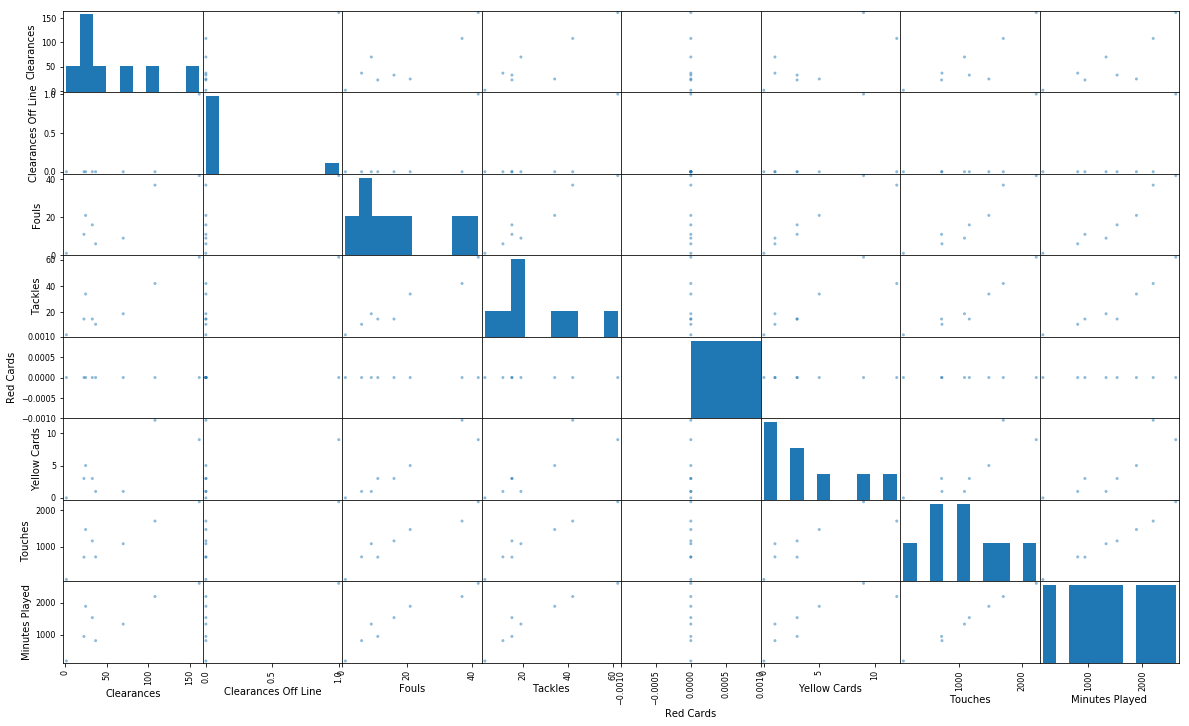

In [38]:
ax = scatter_matrix(training.query("position == 'DF'")[df_kpis + ['Touches', 'Minutes Played']], figsize=(20,12))

## GK

In [50]:
gk = training.query("position == 'GK'")[
    ['high_claim_per_appearance', 'punches_per_appearance', 'saves_per_appearance'
    ,'passes_per_appearance','clearances_per_appearance', 'Minutes Played']
].rename(columns={'high_claim_per_appearance':'High Claims', 'punches_per_appearance': 'Punches', 
                 'saves_per_appearance':'Saves', 'passes_per_appearance': 'Passes',
                  'clearances_per_appearance': 'Clearances'})


max_map = gk.max().to_dict()
gk = pandas.DataFrame(gk.unstack()).reset_index()
gk.columns = ['kpi', 'name', 'value']
gk['denom'] = gk.kpi.map(max_map)
gk['value'] = gk.value / gk.denom
gk.T

,0,1,2,3,4,5,6,7,8,9,10,11
kpi,High Claims,High Claims,Punches,Punches,Saves,Saves,Passes,Passes,Clearances,Clearances,Minutes Played,Minutes Played
name,Bernd Leno,Petr Cech,Bernd Leno,Petr Cech,Bernd Leno,Petr Cech,Bernd Leno,Petr Cech,Bernd Leno,Petr Cech,Bernd Leno,Petr Cech
value,0.364583,1,1,0.571429,0.820312,1,0.900391,1,1,1,1,0.206349
denom,0.857143,0.857143,0.5,0.5,4,4,32,32,1,1,2835,2835


In [42]:
fig = px.line_polar(gk, r='value', theta='kpi', line_dash='name', color='name', line_close=True
                    , template="plotly_white", width=800)

fig.update_traces(mode='lines', line_width=5)
fig.update_layout(legend=dict(x=0.7, y=1.1))
fig.show()

## DF

In [49]:
df = training.query("position == 'DF' and Appearances > 18")[
    ['clearances_per_min_played', 'fouls_per_min_played', 'yc_per_min_played'
    ,'tackles_per_min_played','passes_per_min_played', 'Minutes Played', 'assists_per_min_played']
].rename(columns={'clearances_per_min_played': 'Clearances', 'fouls_per_min_played': 'Fouls'
                  , 'yc_per_min_played': 'Yellow Cards','tackles_per_min_played': 'Tackles'
                  ,'passes_per_min_played': 'Passes', 'assists_per_min_played':'Assists'})

max_map = df.max().to_dict()
df = pandas.DataFrame(df.unstack()).reset_index()
df.columns = ['kpi', 'name', 'value']
df['denom'] = df.kpi.map(max_map)
df['value'] = df.value / df.denom
df.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
kpi,Clearances,Clearances,Clearances,Clearances,Fouls,Fouls,Fouls,Fouls,Yellow Cards,Yellow Cards,Yellow Cards,Yellow Cards,Tackles,Tackles,Tackles,Tackles,Passes,Passes,Passes,Passes,Minutes Played,Minutes Played,Minutes Played,Minutes Played,Assists,Assists,Assists,Assists
name,Héctor Bellerín,Sead Kolasinac,Shkodran Mustafi,Sokratis,Héctor Bellerín,Sead Kolasinac,Shkodran Mustafi,Sokratis,Héctor Bellerín,Sead Kolasinac,Shkodran Mustafi,Sokratis,Héctor Bellerín,Sead Kolasinac,Shkodran Mustafi,Sokratis,Héctor Bellerín,Sead Kolasinac,Shkodran Mustafi,Sokratis,Héctor Bellerín,Sead Kolasinac,Shkodran Mustafi,Sokratis,Héctor Bellerín,Sead Kolasinac,Shkodran Mustafi,Sokratis
value,0.349637,0.214844,1,0.797709,0.620299,0.66036,0.954555,1,0.358611,0.484788,0.630688,1,0.412695,0.758747,1,0.805571,0.758673,0.761175,1,0.934498,0.586233,0.722753,1,0.840918,1,0.811111,0,0.278854
denom,0.0615679,0.0615679,0.0615679,0.0615679,0.0168258,0.0168258,0.0168258,0.0168258,0.00545703,0.00545703,0.00545703,0.00545703,0.0237094,0.0237094,0.0237094,0.0237094,0.674952,0.674952,0.674952,0.674952,2615,2615,2615,2615,0.00326158,0.00326158,0.00326158,0.00326158


In [44]:
fig = px.line_polar(df, r='value', theta='kpi'
                    ,color='name', line_dash='name', line_close=True, template="plotly_white")
fig.update_traces(mode='lines', line_width=4)
fig.update_layout(legend=dict(x=0, y=1.1))
fig.show()

## MF

In [51]:
mf = training.query("position == 'MF' and Appearances > 20")[
    ['assists_per_min_played', 'dispossessed_per_min_played'
    ,'goals_per_min_played','passes_per_min_played','shots_per_min_played', 'tackles_per_min_played'
    ,'touches_per_min_played', 'Minutes Played']
].rename(columns={'assists_per_min_played':'Assists', 'dispossessed_per_min_played':'Dispossessed'
    ,'goals_per_min_played':'Goals','passes_per_min_played':'Passes','shots_per_min_played':'Shots'
    , 'tackles_per_min_played':'Tackles','touches_per_min_played':'Touches'})

max_map = mf.max().to_dict()

mf = pandas.DataFrame(mf.unstack()).reset_index()

mf.columns = ['kpi', 'name', 'value']

mf['denom'] = mf.kpi.map(max_map)

mf['value'] = mf.value / mf.denom
mf.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55
kpi,Assists,Assists,Assists,Assists,Assists,Assists,Assists,Dispossessed,Dispossessed,Dispossessed,Dispossessed,Dispossessed,Dispossessed,Dispossessed,Goals,Goals,Goals,Goals,Goals,Goals,Goals,Passes,Passes,Passes,Passes,Passes,Passes,Passes,Shots,Shots,Shots,Shots,Shots,Shots,Shots,Tackles,Tackles,Tackles,Tackles,Tackles,Tackles,Tackles,Touches,Touches,Touches,Touches,Touches,Touches,Touches,Minutes Played,Minutes Played,Minutes Played,Minutes Played,Minutes Played,Minutes Played,Minutes Played
name,Aaron Ramsey,Granit Xhaka,Henrikh Mkhitaryan,Lucas Torreira,Matteo Guendouzi,Mesut Özil,Nacho Monreal,Aaron Ramsey,Granit Xhaka,Henrikh Mkhitaryan,Lucas Torreira,Matteo Guendouzi,Mesut Özil,Nacho Monreal,Aaron Ramsey,Granit Xhaka,Henrikh Mkhitaryan,Lucas Torreira,Matteo Guendouzi,Mesut Özil,Nacho Monreal,Aaron Ramsey,Granit Xhaka,Henrikh Mkhitaryan,Lucas Torreira,Matteo Guendouzi,Mesut Özil,Nacho Monreal,Aaron Ramsey,Granit Xhaka,Henrikh Mkhitaryan,Lucas Torreira,Matteo Guendouzi,Mesut Özil,Nacho Monreal,Aaron Ramsey,Granit Xhaka,Henrikh Mkhitaryan,Lucas Torreira,Matteo Guendouzi,Mesut Özil,Nacho Monreal,Aaron Ramsey,Granit Xhaka,Henrikh Mkhitaryan,Lucas Torreira,Matteo Guendouzi,Mesut Özil,Nacho Monreal,Aaron Ramsey,Granit Xhaka,Henrikh Mkhitaryan,Lucas Torreira,Matteo Guendouzi,Mesut Özil,Nacho Monreal
value,1,0.176996,0.538524,0.186073,0,0.25426,0.356797,1,0.334326,0.74795,0.578892,0.71183,0.960538,0.0792883,0.825301,0.438225,1,0.230349,0,0.786904,0.147233,0.648453,1,0.539397,0.744561,0.831103,0.715386,0.699188,0.833723,0.389036,1,0.352575,0.250615,0.211982,0.126199,0.937048,0.760976,0.623358,1,0.751821,0.252269,0.68834,0.696084,1,0.654089,0.776378,0.824114,0.714137,0.762703,0.530988,1,0.657337,0.95122,0.856457,0.696122,0.744102
denom,0.00451807,0.00451807,0.00451807,0.00451807,0.00451807,0.00451807,0.00451807,0.0203313,0.0203313,0.0203313,0.0203313,0.0203313,0.0203313,0.0203313,0.00364964,0.00364964,0.00364964,0.00364964,0.00364964,0.00364964,0.00364964,0.897641,0.897641,0.897641,0.897641,0.897641,0.897641,0.897641,0.0298054,0.0298054,0.0298054,0.0298054,0.0298054,0.0298054,0.0298054,0.0273224,0.0273224,0.0273224,0.0273224,0.0273224,0.0273224,0.0273224,1.11315,1.11315,1.11315,1.11315,1.11315,1.11315,1.11315,2501,2501,2501,2501,2501,2501,2501


In [52]:
fig = px.line_polar(mf, r='value', theta='kpi', color='name', line_dash='name',
                    line_close=True, template="plotly_white",
                    width=800) # , color_discrete_sequence= px.colors.sequential.Plasma[-3::-1])

fig.update_traces(mode='lines', line_width=5)
fig.update_layout(legend=dict(x=1, y=1.1))
fig.show()

In [53]:
fig = px.line_polar(mf, r='value', theta='kpi', color='name', line_dash='name',
                    line_close=True, template="plotly_white", width=800 )

fig.update_traces(mode='lines', line_width=5)
fig.update_layout(legend=dict(x=-.4, y=.1))
fig.show()

## FW

In [60]:
fw = training.query("position == 'FW' and Appearances > 10")[
    ['assists_per_min_played', 'missed_chances_per_min_played', 'goals_per_min_played'
    ,'offsides_per_min_played', 'shots_per_min_played', 'dispossessed_per_min_played'
     ,'fouls_per_min_played']
].rename(columns={'assists_per_min_played':'Assists', 'missed_chances_per_min_played':'Missed Chances'
                 ,'goals_per_min_played':'Goals', 'offsides_per_min_played': 'Offsides'
                 ,'shots_per_min_played':'Shots', 'dispossessed_per_min_played':'Dispossessed'
                 ,'fouls_per_min_played':'Fouls'})

max_map = fw.max().to_dict()
fw = pandas.DataFrame(fw.unstack()).reset_index()
fw.columns = ['kpi', 'name', 'value']
fw['denom'] = fw.kpi.map(max_map)
fw['value'] = fw.value / fw.denom
fw.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
kpi,Assists,Assists,Assists,Missed Chances,Missed Chances,Missed Chances,Goals,Goals,Goals,Offsides,Offsides,Offsides,Shots,Shots,Shots,Dispossessed,Dispossessed,Dispossessed,Fouls,Fouls,Fouls
name,Alex Iwobi,Alexandre Lacazette,Pierre-Emerick Aubameyang,Alex Iwobi,Alexandre Lacazette,Pierre-Emerick Aubameyang,Alex Iwobi,Alexandre Lacazette,Pierre-Emerick Aubameyang,Alex Iwobi,Alexandre Lacazette,Pierre-Emerick Aubameyang,Alex Iwobi,Alexandre Lacazette,Pierre-Emerick Aubameyang,Alex Iwobi,Alexandre Lacazette,Pierre-Emerick Aubameyang,Alex Iwobi,Alexandre Lacazette,Pierre-Emerick Aubameyang
value,0.952713,1,0.573279,0.180638,0.616211,1,0.188848,0.644221,1,0.105857,1,0.879028,0.51565,0.939445,1,1,0.857514,0.425511,0.19926,1,0.233808
denom,0.00319361,0.00319361,0.00319361,0.00842182,0.00842182,0.00842182,0.00805566,0.00805566,0.00805566,0.00958084,0.00958084,0.00958084,0.0344196,0.0344196,0.0344196,0.0283976,0.0283976,0.0283976,0.0203593,0.0203593,0.0203593


In [61]:
fig = px.line_polar(fw, r='value', theta='kpi', color='name', line_dash='name',
                    line_close=True, template="plotly_white",
                    width=800, text='value')
fig.update_traces(mode='lines', line_width=5)
fig.update_layout(legend=dict(x=.8, y=1.1))
fig.show()